In [1]:
import tensorflow as tf
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import sys, getopt
from keras import backend as K
import glob
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
path = r'D:\data\sale in csv\sales20-23' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

Exchange_rate = pd.read_csv(r'D:\data\sale in csv\exchange.csv')
Kolkata_temp = pd.read_csv(r'D:\Users\House of Musa\kol_temp.csv')

Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'], format = '%Y-%m-%d')
Exchange_rate
Kolkata_temp['time'] = pd.to_datetime(Kolkata_temp['time'], format = '%Y-%m-%d')
Kolkata_temp

,time,tavg
0,2018-01-01,19.9
1,2018-01-02,19.3
2,2018-01-03,18.3
3,2018-01-04,16.7
4,2018-01-05,15.6
...,...,...
2167,2023-12-08,21.0
2168,2023-12-09,21.0
2169,2023-12-10,21.0
2170,2023-12-11,21.0


In [3]:
df['Total_Amt'] = (df['RSP'] * df['Bill_Qty']) - (df['Discount_Amt'])
print(df.Store.unique())

['CITIMART - CHOWRINGHEE' 'CITIMART - COOCH BEHAR' 'CITIMART - GARIAHAT'
 'CITIMART - HATIBAGAN' 'CITIMART - LAKE MALL' 'CITIMART - NEW MARKET'
 'CITIMART -BIDHAN ROAD' 'CITIMART -BURDWAN']


In [81]:
# splitting dataframe by Store location
# grouping by particular dataframe column
grouped = df.groupby(df.Store)
df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]


In [82]:
len(pd.unique(df_CHOWRINGHEE['DEPARTMENT']))

605

In [83]:
#STORE-CHOWRINGHEE
#grouped_chowringhee = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.DEPARTMENT)
grouped_chowringhee = df_NEWMARKET.groupby(df_NEWMARKET.DEPARTMENT)
#grouped_chowringhee = df_HATIBAGAN.groupby(df_HATIBAGAN.DEPARTMENT)

#MEN
df_CHOWRINGHEE_TshirtM = grouped_chowringhee.get_group('T-Shirts (M)')
df_CHOWRINGHEE_JeansM = grouped_chowringhee.get_group('Jeans (M)')
df_CHOWRINGHEE_FormalshirtM = grouped_chowringhee.get_group('Formal Shirts (M)')
df_CHOWRINGHEE_CasualshirtM = grouped_chowringhee.get_group('Casual Shirts (M)')
df_CHOWRINGHEE_CasualtrouserM = grouped_chowringhee.get_group('Casual Trouser (M)')
df_CHOWRINGHEE_BermundasM = grouped_chowringhee.get_group('Bermudas (M)')
df_CHOWRINGHEE_JacketM = grouped_chowringhee.get_group('Jacket (M)')
df_CHOWRINGHEE_PulloverM = grouped_chowringhee.get_group('Pullover (M)')
df_CHOWRINGHEE_PyajamaM = grouped_chowringhee.get_group('Pyajama (M)')
df_CHOWRINGHEE_FormaltrouserM = grouped_chowringhee.get_group('Formal Trouser (M)')
df_CHOWRINGHEE_LingeriesM = grouped_chowringhee.get_group('Lingeries (M)')
df_CHOWRINGHEE_SweaterstM = grouped_chowringhee.get_group('Sweaters (M)')
df_CHOWRINGHEE_BlazerM = grouped_chowringhee.get_group('Blazer (M)')

#LADIES
df_CHOWRINGHEE_KurtiL = grouped_chowringhee.get_group('Kurti (L)')
df_CHOWRINGHEE_JeansL = grouped_chowringhee.get_group('Jeans (L)')
df_CHOWRINGHEE_TopL = grouped_chowringhee.get_group('Top (L)')
df_CHOWRINGHEE_SalwarsuitL = grouped_chowringhee.get_group('Salwar Suit (L)')
df_CHOWRINGHEE_TshirtL = grouped_chowringhee.get_group('T-Shirt (L)')
df_CHOWRINGHEE_ShirtL = grouped_chowringhee.get_group('Shirt (L)')
df_CHOWRINGHEE_PlazoL = grouped_chowringhee.get_group('Plazo (L)')
df_CHOWRINGHEE_TrousersL = grouped_chowringhee.get_group('Trousers (L)')
df_CHOWRINGHEE_SweatersL = grouped_chowringhee.get_group('Sweaters (L)')
#df_CHOWRINGHEE_DressesL = grouped_chowringhee.get_group('Dress (L)')
df_CHOWRINGHEE_SkirtsL = grouped_chowringhee.get_group('Skirts (L)')
df_CHOWRINGHEE_PulloverL = grouped_chowringhee.get_group('Pullover (L)')
df_CHOWRINGHEE_JacketL = grouped_chowringhee.get_group('Jacket (L)')
df_CHOWRINGHEE_NightyL = grouped_chowringhee.get_group('Nighty (L)')
df_CHOWRINGHEE_HalfpantL = grouped_chowringhee.get_group('Half Pant (L)')
df_CHOWRINGHEE_LeggingsL = grouped_chowringhee.get_group('Leggings (L)')
df_CHOWRINGHEE_LachaL = grouped_chowringhee.get_group('Lacha (L)')
df_CHOWRINGHEE_CapriL = grouped_chowringhee.get_group('Capri (L)')
df_CHOWRINGHEE_ParallelL = grouped_chowringhee.get_group('Parallel (L)')
df_CHOWRINGHEE_TunicL = grouped_chowringhee.get_group('Tunic (L)')
df_CHOWRINGHEE_StoleL = grouped_chowringhee.get_group('Stole (L)')
df_CHOWRINGHEE_SareeCotton = grouped_chowringhee.get_group('Cotton')
df_CHOWRINGHEE_SareeTant = grouped_chowringhee.get_group('Tant')
df_CHOWRINGHEE_SareeSynthetics = grouped_chowringhee.get_group('Synthetics')
df_CHOWRINGHEE_SareeEmbroidery = grouped_chowringhee.get_group('Embroidery')
df_CHOWRINGHEE_SareePremiume = grouped_chowringhee.get_group('Premiume')
df_CHOWRINGHEE_Fancy = grouped_chowringhee.get_group('Fancy')

#GIRLS
df_CHOWRINGHEE_FrockG = grouped_chowringhee.get_group('Frock (G)')
df_CHOWRINGHEE_TopG = grouped_chowringhee.get_group('Top (G)')
df_CHOWRINGHEE_CaprisetG = grouped_chowringhee.get_group('Capri Set (G)')
df_CHOWRINGHEE_JeansG = grouped_chowringhee.get_group('Jeans (G)')
df_CHOWRINGHEE_TshirtG = grouped_chowringhee.get_group('T-Shirt (G)')
df_CHOWRINGHEE_HalfpantG = grouped_chowringhee.get_group('Half Pant (G)')
df_CHOWRINGHEE_SkirttopsetG = grouped_chowringhee.get_group('Skirt Top Set (G)')
df_CHOWRINGHEE_CapriG = grouped_chowringhee.get_group('Capri (G)')
df_CHOWRINGHEE_HalfPantSetG = grouped_chowringhee.get_group('Half Pant Set (G)')
df_CHOWRINGHEE_SkirtsG = grouped_chowringhee.get_group('Skirts (G)')
df_CHOWRINGHEE_PulloverG = grouped_chowringhee.get_group('Pullover (G)')
df_CHOWRINGHEE_SweaterG = grouped_chowringhee.get_group('Sweater (G)')
df_CHOWRINGHEE_Plazo = grouped_chowringhee.get_group('Plazo (G)')
df_CHOWRINGHEE_JacketG = grouped_chowringhee.get_group('Jacket (G)')
df_CHOWRINGHEE_JeggingsG = grouped_chowringhee.get_group('Jeggings (G)')

#BOYS
df_CHOWRINGHEE_TshirtB = grouped_chowringhee.get_group('T-Shirt (B)')
df_CHOWRINGHEE_BabasuitB = grouped_chowringhee.get_group('Baba Suit (B)')
df_CHOWRINGHEE_ShirtB = grouped_chowringhee.get_group('Shirt (B)')
df_CHOWRINGHEE_JeansB = grouped_chowringhee.get_group('Jeans (B)')
df_CHOWRINGHEE_TrouserB = grouped_chowringhee.get_group('Trouser (B)')
df_CHOWRINGHEE_CapriB = grouped_chowringhee.get_group('Capri (B)')
df_CHOWRINGHEE_HalfpantB = grouped_chowringhee.get_group('Half Pant (B)')
df_CHOWRINGHEE_PulloverB = grouped_chowringhee.get_group('Pullover (B)')
df_CHOWRINGHEE_JacketB = grouped_chowringhee.get_group('Jacket (B)')

#OTHERS
df_CHOWRINGHEE_Dressmaterial = grouped_chowringhee.get_group('Dress Material')

df_CHOWRINGHEE_Bedsheets = grouped_chowringhee.get_group('Bed Sheets')
df_CHOWRINGHEE_Sweets = grouped_chowringhee.get_group('Sweets')
df_CHOWRINGHEE_Deo = grouped_chowringhee.get_group('Deo')
#df_CHOWRINGHEE_Whiskey = grouped_chowringhee.get_group('Whisky')
df_CHOWRINGHEE_Towel = grouped_chowringhee.get_group('Towel')
df_CHOWRINGHEE_Chappal = grouped_chowringhee.get_group('Chappal')
df_CHOWRINGHEE_Kashmiriswals = grouped_chowringhee.get_group('Kashmiri Swals')
df_CHOWRINGHEE_Novelties = grouped_chowringhee.get_group('Novelties')
df_CHOWRINGHEE_sportsshoe = grouped_chowringhee.get_group('Sports Shoe')
df_CHOWRINGHEE_Hairshampoo = grouped_chowringhee.get_group('Hair Shampoo')
df_CHOWRINGHEE_Perfumes = grouped_chowringhee.get_group('Perfumes')
df_CHOWRINGHEE_Stationary = grouped_chowringhee.get_group('Stationary')

df_CHOWRINGHEE_Facewash = grouped_chowringhee.get_group('Facewash')
df_CHOWRINGHEE_TrollyBag = grouped_chowringhee.get_group('Trolly Bag')
df_CHOWRINGHEE_Shoe = grouped_chowringhee.get_group('Shoe')
df_CHOWRINGHEE_Toys = grouped_chowringhee.get_group('Toys')
df_CHOWRINGHEE_Bag = grouped_chowringhee.get_group('Bag')

df_CHOWRINGHEE_FridgeBottle = grouped_chowringhee.get_group('Fridge Bottle')
df_CHOWRINGHEE_Blankets = grouped_chowringhee.get_group('Blankets')
df_CHOWRINGHEE_Imitation = grouped_chowringhee.get_group('Imitation')
#df_CHOWRINGHEE_LipSticks = grouped_chowringhee.get_group('Lip Sticks')
df_CHOWRINGHEE_SkinCream = grouped_chowringhee.get_group('Skin Cream')
df_CHOWRINGHEE_Soap = grouped_chowringhee.get_group('Soap')
df_CHOWRINGHEE_Other = grouped_chowringhee.get_group('Other')
df_CHOWRINGHEE_BabyAccessory = grouped_chowringhee.get_group('Baby Accessory')
df_CHOWRINGHEE_LiquidConcentrates = grouped_chowringhee.get_group('Liquid Concentrates')
#df_CHOWRINGHEE_Foundation = grouped_chowringhee.get_group('Foundation')
df_CHOWRINGHEE_Bra = grouped_chowringhee.get_group('Bra')
df_CHOWRINGHEE_Confectionery = grouped_chowringhee.get_group('CONFECTIONERY')
df_CHOWRINGHEE_Belt = grouped_chowringhee.get_group('Belt')
df_CHOWRINGHEE_DryFlower = grouped_chowringhee.get_group('Dry Flower')
df_CHOWRINGHEE_Sandal = grouped_chowringhee.get_group('Sandal')
df_CHOWRINGHEE_Curtains = grouped_chowringhee.get_group('Curtains')
#df_CHOWRINGHEE_LipColour = grouped_chowringhee.get_group('Lip Colour')
df_CHOWRINGHEE_Container = grouped_chowringhee.get_group('Container')
df_CHOWRINGHEE_SchoolBag = grouped_chowringhee.get_group('School Bag')



#Kids
#df_CHOWRINGHEE_BombabyK = grouped_chowringhee.get_group('Bom Baby (K)')
df_CHOWRINGHEE_TshirtRm = grouped_chowringhee.get_group('T-Shirts (Rm)')

#FOOD
df_CHOWRINGHEE_InstantNoodles = grouped_chowringhee.get_group('INSTANT NOODLES')
df_CHOWRINGHEE_Sauces = grouped_chowringhee.get_group('Sauces')
df_CHOWRINGHEE_CtcTea = grouped_chowringhee.get_group('Ctc Tea')
df_CHOWRINGHEE_FruitBasedJuices = grouped_chowringhee.get_group('Fruit Based Juices')
df_CHOWRINGHEE_Pickles = grouped_chowringhee.get_group('Pickles')
df_CHOWRINGHEE_SugarBoilesChocolates = grouped_chowringhee.get_group('Sugar Boiled Chocolates')
df_CHOWRINGHEE_NINamkeens = grouped_chowringhee.get_group('N.I.Namkeens')
df_CHOWRINGHEE_Jams = grouped_chowringhee.get_group('Jams')
df_CHOWRINGHEE_ChineseNoodles = grouped_chowringhee.get_group('CHINESE NOODLES')
df_CHOWRINGHEE_Cookies = grouped_chowringhee.get_group('Cookies')


In [84]:
df1 = df_CHOWRINGHEE_TshirtM.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Total_Amt']]
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort

,Bill_Date,RSP,Bill_Qty,Total_Amt
123262,2020-01-01,569.0,1.0,569.0
125166,2020-01-01,329.0,1.0,329.0
123203,2020-01-01,349.0,1.0,349.0
125653,2020-01-01,329.0,1.0,329.0
125652,2020-01-01,299.0,1.0,299.0
...,...,...,...,...
4996327,2023-12-12,699.0,1.0,699.0
4996324,2023-12-12,699.0,1.0,699.0
4996412,2023-12-12,529.0,1.0,529.0
4996381,2023-12-12,549.0,1.0,549.0


In [88]:
!pip3 install holidays

In [89]:
import pandas as pd
import holidays

In [90]:
 def get_national_holidays(start_date, end_date, country):
    # Get the Bank Holidays for the given country
    holiday_days = holidays.CountryHoliday(country)

    # Create a list of dates between the start and end date
    date_range = pd.date_range(start_date, end_date)

    # Filter the dates to only include Bank Holidays
    national_holidays = [date for date in date_range if date in holiday_days]

    return national_holidays

In [93]:
national_holidays = get_national_holidays('2020-01-01', '2023-12-12', 'IN')
national_holidays

[Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-08-15 00:00:00'),
 Timestamp('2020-08-29 00:00:00'),
 Timestamp('2020-10-02 00:00:00'),
 Timestamp('2020-10-29 00:00:00'),
 Timestamp('2020-11-14 00:00:00'),
 Timestamp('2020-12-25 00:00:00'),
 Timestamp('2021-01-14 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-03-28 00:00:00'),
 Timestamp('2021-03-29 00:00:00'),
 Timestamp('2021-04-02 00:00:00'),
 Timestamp('2021-04-04 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-05-13 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-05-23 00:00:00'),
 Timestamp('2021-07-

In [154]:
holidays = pd.to_datetime(national_holidays, format='%Y-%m-%d')
holiday_list = pd.DataFrame(holidays)
holiday_list= holiday_list.assign(holiday_flag = 1)
holiday_list = holiday_list.reset_index().rename(columns={0: 'Date'})
holiday_list = holiday_list.loc[:, ['Date', 'holiday_flag']]

holiday_list.index = pd.to_datetime(holiday_list.Date)

min_date = '2020-01-01'
max_date = '2023-12-12'   # change your date here

daterange = pd.date_range(min_date, max_date)

df_holiday = holiday_list.resample('D').agg({'holiday_flag': 'sum'}).reindex(daterange)

#df_holiday = holiday_list.resample('D').agg({'holiday_flag': 'sum'})
df_holiday['holiday_flag'] = df_holiday['holiday_flag'].fillna(0)
df_holiday.index.name = 'Date'
df_holiday.head()


,holiday_flag
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [155]:
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
all_dates = pd.DataFrame(pd.date_range(df1_sort['Bill_Date'].min(), df1_sort['Bill_Date'].max()), columns=['Bill_Date'])

# from the all_dates DataFrame, left join onto the DataFrame with missing dates
new_df = all_dates.merge(right=df1_sort, how='left', on='Bill_Date')
print(len(pd.unique(new_df['Bill_Date'])))
new_df.tail(15)
new_df.isnull().sum()

1442


Bill_Date     0
RSP          94
Bill_Qty     94
Total_Amt    94
dtype: int64

In [157]:
df_a = new_df.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Total_Amt=('Total_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a
df_exchange = df_a.merge(Exchange_rate, left_on = 'Bill_Date', right_on = 'Date')
df_ex_temp = df_exchange.merge(Kolkata_temp, left_on = 'Bill_Date', right_on = 'time')
df_ex_temp_hol = df_ex_temp.merge(df_holiday, left_on = 'Bill_Date', right_on = 'Date')
df_f = df_ex_temp_hol.loc[:, [ 'Bill_Date', 'Total_Amt', 'Total_Qty', 'RSP_AVG', 'Price', 'tavg', 'holiday_flag']]
df_f.head()

,Bill_Date,Total_Amt,Total_Qty,RSP_AVG,Price,tavg,holiday_flag
0,2020-01-01,25021.8,63.0,424.172414,71.227,18.7,0.0
1,2020-01-02,26747.8,61.0,496.118644,71.350,20.3,0.0
2,2020-01-03,13356.0,32.0,509.000000,71.770,17.5,0.0
3,2020-01-06,17671.6,40.0,457.048780,71.867,17.0,0.0
4,2020-01-07,7954.5,17.0,509.000000,71.845,16.7,0.0


In [167]:
df_daily.head(3)
df_f.index = pd.to_datetime(df_f.Bill_Date)
df_f
df_daily = df_f.resample('D').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean', "holiday_flag": 'mean'})
df_monthly = df_f.resample('M').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean', "holiday_flag": 'mean'})

In [168]:
# check number of nan values in dataframe
df_daily.isna().sum()

Total_Amt         0
Total_Qty         0
RSP_AVG         478
Price           410
tavg            410
holiday_flag    410
dtype: int64

In [169]:
df_monthly.isna().sum()

Total_Amt       0
Total_Qty       0
RSP_AVG         1
Price           0
tavg            0
holiday_flag    0
dtype: int64

In [170]:
df_daily.mean()

Total_Amt       38373.986012
Total_Qty          93.424411
RSP_AVG           453.623342
Price              77.235888
tavg               26.742345
holiday_flag        0.038760
dtype: float64

In [171]:
# fill the nan values by upper row value
df_daily = df_daily.fillna(df_daily.mean())
df_daily.tail()
df_daily['Total_Amt'] = df_daily['Total_Amt'].fillna((df_daily['Total_Amt'].mean()))
df_daily

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg,holiday_flag
Bill_Date,,,,,,
2020-01-01,25021.8,63.0,424.172414,71.227000,18.700000,0.00000
2020-01-02,26747.8,61.0,496.118644,71.350000,20.300000,0.00000
2020-01-03,13356.0,32.0,509.000000,71.770000,17.500000,0.00000
2020-01-04,0.0,0.0,453.623342,77.235888,26.742345,0.03876
2020-01-05,0.0,0.0,453.623342,77.235888,26.742345,0.03876
...,...,...,...,...,...,...
2023-12-08,22685.0,35.0,660.891892,83.425000,21.000000,0.00000
2023-12-09,33058.1,54.0,630.607143,83.425000,21.000000,0.00000
2023-12-10,27690.0,40.0,694.526316,83.350000,21.000000,0.00000


In [172]:
# fill the nan values by upper row value
df_monthly = df_monthly.fillna(df_monthly.mean())
df_monthly.tail()

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg,holiday_flag
Bill_Date,,,,,,
2023-08-31,925122.69,1990.0,475.542313,82.820043,29.169565,0.043478
2023-09-30,1787230.80,3530.0,508.618545,83.040190,28.661905,0.047619
2023-10-31,2681187.80,5238.0,521.792205,83.194500,27.527273,0.045455
2023-11-30,572959.46,1092.0,538.470647,83.253136,24.545455,0.000000
2023-12-31,202819.30,333.0,617.105595,83.362700,21.900000,0.000000


In [173]:
df_monthly.isnull().any()

Total_Amt       False
Total_Qty       False
RSP_AVG         False
Price           False
tavg            False
holiday_flag    False
dtype: bool

In [174]:
df_daily.isnull().any()

Total_Amt       False
Total_Qty       False
RSP_AVG         False
Price           False
tavg            False
holiday_flag    False
dtype: bool

In [175]:
df_daily.head(3)

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg,holiday_flag
Bill_Date,,,,,,
2020-01-01,25021.8,63.0,424.172414,71.227,18.7,0.0
2020-01-02,26747.8,61.0,496.118644,71.350,20.3,0.0
2020-01-03,13356.0,32.0,509.000000,71.770,17.5,0.0


In [176]:
df_monthly.tail(3)

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg,holiday_flag
Bill_Date,,,,,,
2023-10-31,2681187.80,5238.0,521.792205,83.194500,27.527273,0.045455
2023-11-30,572959.46,1092.0,538.470647,83.253136,24.545455,0.000000
2023-12-31,202819.30,333.0,617.105595,83.362700,21.900000,0.000000


In [177]:
df_daily.shape

(1442, 6)

In [178]:
test_split=round(len(df_daily)*0.20)

In [179]:
t=test_split
print(t)

288


In [180]:
df_for_training=df_daily[:-(t)]
df_for_testing=df_daily[-(t):]

In [181]:
print(df_for_training.shape)
print(df_for_testing.shape)

(1154, 6)
(288, 6)


In [182]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [183]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [184]:
df_for_training_scaled

array([[0.06655757, 0.08653846, 0.31412696, 0.04199838, 0.18604651,
        0.        ],
       [0.0711487 , 0.08379121, 0.41444683, 0.05199025, 0.27906977,
        0.        ],
       [0.03552674, 0.04395604, 0.43240824, 0.08610885, 0.11627907,
        0.        ],
       ...,
       [0.        , 0.        , 0.35519253, 0.53012897, 0.65362471,
        0.03875969],
       [0.        , 0.        , 0.35519253, 0.53012897, 0.65362471,
        0.03875969],
       [0.12202833, 0.15796703, 0.30286266, 0.97010561, 0.62209302,
        0.        ]])

In [185]:
df_for_training_scaled.shape

(1154, 6)

In [186]:
df_for_testing_scaled.shape

(288, 6)

In [187]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY) 

In [188]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [189]:
trainX.shape

(1124, 30, 6)

In [190]:
testX,testY=createXY(df_for_testing_scaled,30)

In [191]:
trainX[0]

array([[6.65575719e-02, 8.65384615e-02, 3.14126961e-01, 4.19983753e-02,
        1.86046512e-01, 0.00000000e+00],
       [7.11487032e-02, 8.37912088e-02, 4.14446829e-01, 5.19902518e-02,
        2.79069767e-01, 0.00000000e+00],
       [3.55267379e-02, 4.39560440e-02, 4.32408242e-01, 8.61088546e-02,
        1.16279070e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.55192535e-01, 5.30128968e-01,
        6.53624707e-01, 3.87596899e-02],
       [0.00000000e+00, 0.00000000e+00, 3.55192535e-01, 5.30128968e-01,
        6.53624707e-01, 3.87596899e-02],
       [4.70061621e-02, 5.49450549e-02, 3.59968873e-01, 9.39886271e-02,
        8.72093023e-02, 0.00000000e+00],
       [2.11588377e-02, 2.33516484e-02, 4.32408242e-01, 9.22014622e-02,
        6.97674419e-02, 0.00000000e+00],
       [2.72887694e-02, 2.88461538e-02, 4.03856798e-01, 6.49878148e-02,
        1.80232558e-01, 0.00000000e+00],
       [5.19691591e-02, 5.63186813e-02, 4.40425885e-01, 4.06173842e-02,
        1.86046512e-01, 

In [192]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1124, 30, 6)
trainY Shape--  (1124,)


In [193]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (258, 30, 6)
testY Shape--  (258,)


In [194]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[6.65575719e-02 8.65384615e-02 3.14126961e-01 4.19983753e-02
  1.86046512e-01 0.00000000e+00]
 [7.11487032e-02 8.37912088e-02 4.14446829e-01 5.19902518e-02
  2.79069767e-01 0.00000000e+00]
 [3.55267379e-02 4.39560440e-02 4.32408242e-01 8.61088546e-02
  1.16279070e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.55192535e-01 5.30128968e-01
  6.53624707e-01 3.87596899e-02]
 [0.00000000e+00 0.00000000e+00 3.55192535e-01 5.30128968e-01
  6.53624707e-01 3.87596899e-02]
 [4.70061621e-02 5.49450549e-02 3.59968873e-01 9.39886271e-02
  8.72093023e-02 0.00000000e+00]
 [2.11588377e-02 2.33516484e-02 4.32408242e-01 9.22014622e-02
  6.97674419e-02 0.00000000e+00]
 [2.72887694e-02 2.88461538e-02 4.03856798e-01 6.49878148e-02
  1.80232558e-01 0.00000000e+00]
 [5.19691591e-02 5.63186813e-02 4.40425885e-01 4.06173842e-02
  1.86046512e-01 0.00000000e+00]
 [3.87562237e-02 4.39560440e-02 4.50400149e-01 2.03086921e-02
  1.51162791e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.55

In [195]:
trainY[0]

0.07489715174300729

In [196]:
trainY.shape

(1124,)

In [197]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


In [198]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,6)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_13656\2884203345.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [199]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
36/36 [==============================] - 9s 88ms/step - loss: 0.0216 - val_loss: 0.0179
Epoch 2/8
36/36 [==============================] - 2s 61ms/step - loss: 0.0163 - val_loss: 0.0161
Epoch 3/8
36/36 [==============================] - 2s 59ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 4/8
36/36 [==============================] - 2s 60ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 5/8
36/36 [==============================] - 2s 53ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 6/8
36/36 [==============================] - 2s 44ms/step - loss: 0.0156 - val_loss: 0.0180
Epoch 7/8
36/36 [==============================] - 2s 61ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 8/8
36/36 [==============================] - 1s 18ms/step - loss: 0.0075
Epoch 1/8
36/36 [==============================] - 7s 83ms/step - loss: 0.0094 - val_loss: 0.0184
Epoch 2/8
36/36 [==============================] - 2s 49ms/step - loss: 0.0077 - val_loss: 0.0254
Epoch 3/8
36/36 [======================

In [200]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 10, 'optimizer': 'adam'}

In [201]:
my_model=grid_search.best_estimator_.model

In [202]:
my_model

In [203]:
prediction=my_model.predict(testX)

9/9 [==============================] - 1s 33ms/step


In [204]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.10666408]
 [0.11916968]
 [0.13164078]
 [0.12986808]
 [0.12076247]
 [0.12607144]
 [0.13563722]
 [0.15063229]
 [0.16386956]
 [0.17181946]
 [0.16736397]
 [0.15606815]
 [0.16292031]
 [0.17250308]
 [0.19102016]
 [0.20756939]
 [0.22921175]
 [0.22506386]
 [0.20985489]
 [0.20286226]
 [0.20608915]
 [0.2135501 ]
 [0.22882117]
 [0.22802389]
 [0.21712174]
 [0.19938292]
 [0.18692148]
 [0.1759319 ]
 [0.16674459]
 [0.15685162]
 [0.15020308]
 [0.13350736]
 [0.11361066]
 [0.09804855]
 [0.0924533 ]
 [0.09130078]
 [0.09538908]
 [0.10265265]
 [0.09948981]
 [0.09138982]
 [0.08821981]
 [0.08960216]
 [0.09272435]
 [0.09675217]
 [0.1026678 ]
 [0.09879589]
 [0.09005235]
 [0.08562566]
 [0.08509737]
 [0.08793461]
 [0.09062196]
 [0.09394786]
 [0.08796415]
 [0.07766011]
 [0.07453521]
 [0.07694694]
 [0.08392591]
 [0.0903095 ]
 [0.09575914]
 [0.09113007]
 [0.08158924]
 [0.07662458]
 [0.07573729]
 [0.07726338]
 [0.07889947]
 [0.08073202]
 [0.0749897 ]
 [0.06570829]
 [0.06137358]
 [0.0622951 ]
 [0.0660

In [205]:
prediction.shape

(258, 1)

In [206]:
scaler.inverse_transform(prediction)

ValueError: non-broadcastable output operand with shape (258,1) doesn't match the broadcast shape (258,6)

In [207]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)

In [208]:
prediction_copies_array.shape

(258, 5)

In [212]:
prediction_copies_array

array([[0.10666408, 0.10666408, 0.10666408, 0.10666408, 0.10666408],
       [0.11916968, 0.11916968, 0.11916968, 0.11916968, 0.11916968],
       [0.13164078, 0.13164078, 0.13164078, 0.13164078, 0.13164078],
       ...,
       [0.06070672, 0.06070672, 0.06070672, 0.06070672, 0.06070672],
       [0.06512562, 0.06512562, 0.06512562, 0.06512562, 0.06512562],
       [0.06645159, 0.06645159, 0.06645159, 0.06645159, 0.06645159]],
      dtype=float32)

In [213]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),6)))[:,0]

ValueError: cannot reshape array of size 1290 into shape (258,6)

In [55]:
pred

array([ 47647.73 ,  53108.176,  58698.08 ,  58398.89 ,  54675.066,
        56622.785,  60595.29 ,  66797.055,  72508.77 ,  81220.59 ,
        81568.6  ,  77384.945,  79255.16 ,  82329.805,  88854.91 ,
        94881.58 , 103023.195, 101964.195,  95971.375,  92571.44 ,
        93525.94 ,  96795.22 , 103529.58 , 109701.96 , 107651.89 ,
       100727.055,  94845.37 ,  89026.11 ,  83477.1  ,  77748.28 ,
        73386.62 ,  65228.383,  55602.15 ,  52894.63 ,  51107.51 ,
        50121.395,  50769.367,  52464.797,  49975.344,  45244.42 ,
        42724.477,  42476.51 ,  43236.305,  44697.13 ,  47142.84 ,
        45751.84 ,  42039.258,  39992.125,  39638.195,  40696.293,
        41854.746,  43217.625,  40659.53 ,  36044.43 ,  34368.08 ,
        35124.56 ,  37888.824,  40570.46 ,  42969.883,  41224.273,
        37172.42 ,  34783.062,  34209.027,  34691.19 ,  35387.984,
        36253.613,  34077.117,  30263.498,  28325.59 ,  28604.09 ,
        30108.541,  33218.395,  36390.81 ,  35591.12 ,  32579.

In [56]:
original_copies_array = np.repeat(testY,6, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,0]

In [57]:
pred

array([ 47647.73 ,  53108.176,  58698.08 ,  58398.89 ,  54675.066,
        56622.785,  60595.29 ,  66797.055,  72508.77 ,  81220.59 ,
        81568.6  ,  77384.945,  79255.16 ,  82329.805,  88854.91 ,
        94881.58 , 103023.195, 101964.195,  95971.375,  92571.44 ,
        93525.94 ,  96795.22 , 103529.58 , 109701.96 , 107651.89 ,
       100727.055,  94845.37 ,  89026.11 ,  83477.1  ,  77748.28 ,
        73386.62 ,  65228.383,  55602.15 ,  52894.63 ,  51107.51 ,
        50121.395,  50769.367,  52464.797,  49975.344,  45244.42 ,
        42724.477,  42476.51 ,  43236.305,  44697.13 ,  47142.84 ,
        45751.84 ,  42039.258,  39992.125,  39638.195,  40696.293,
        41854.746,  43217.625,  40659.53 ,  36044.43 ,  34368.08 ,
        35124.56 ,  37888.824,  40570.46 ,  42969.883,  41224.273,
        37172.42 ,  34783.062,  34209.027,  34691.19 ,  35387.984,
        36253.613,  34077.117,  30263.498,  28325.59 ,  28604.09 ,
        30108.541,  33218.395,  36390.81 ,  35591.12 ,  32579.

In [58]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [ 47647.73   53108.176  58698.08   58398.89   54675.066  56622.785
  60595.29   66797.055  72508.77   81220.59   81568.6    77384.945
  79255.16   82329.805  88854.91   94881.58  103023.195 101964.195
  95971.375  92571.44   93525.94   96795.22  103529.58  109701.96
 107651.89  100727.055  94845.37   89026.11   83477.1    77748.28
  73386.62   65228.383  55602.15   52894.63   51107.51   50121.395
  50769.367  52464.797  49975.344  45244.42   42724.477  42476.51
  43236.305  44697.13   47142.84   45751.84   42039.258  39992.125
  39638.195  40696.293  41854.746  43217.625  40659.53   36044.43
  34368.08   35124.56   37888.824  40570.46   42969.883  41224.273
  37172.42   34783.062  34209.027  34691.19   35387.984  36253.613
  34077.117  30263.498  28325.59   28604.09   30108.541  33218.395
  36390.81   35591.12   32579.459  31827.791  33384.496  36388.836
  38665.062  41225.03   40522.9    37742.812  38280.18   40204.48
  42228.836  45544.777  48587.242  47423.723  43724.

In [59]:
import matplotlib.pyplot as plt

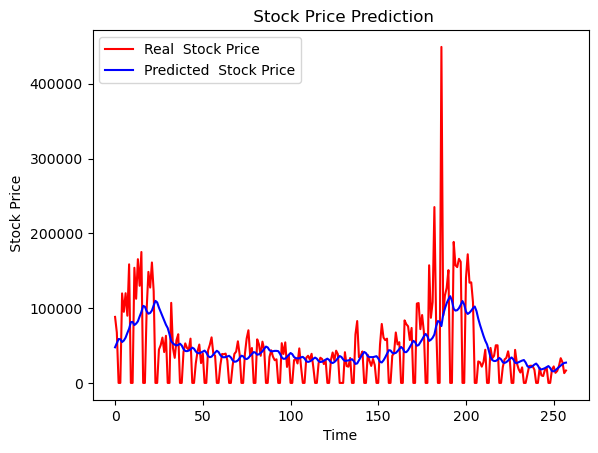

In [60]:
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [66]:
df_60_days_past=df_daily.iloc[-60:,:]

In [67]:
df_60_days_past

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
Bill_Date,,,,,
2023-10-14,0.00,0.0,453.623342,77.235888,26.742345
2023-10-15,0.00,0.0,453.623342,77.235888,26.742345
2023-10-16,140270.20,285.0,497.892508,83.190000,27.800000
2023-10-17,171989.10,349.0,510.568627,83.240000,27.400000
2023-10-18,133983.30,281.0,489.324675,83.290000,27.800000
2023-10-19,134457.90,273.0,515.967509,83.097000,27.600000
2023-10-20,107703.60,211.0,532.242009,83.150000,26.700000
2023-10-21,0.00,0.0,453.623342,77.235888,26.742345
2023-10-22,0.00,0.0,453.623342,77.235888,26.742345


In [68]:
df_60_days_past.shape

(60, 5)

In [70]:
df_60_days_past["Total_Amt"]=0
df_60_days_past=df_60_days_past[["Total_Amt", "Total_Qty", "RSP_AVG", "Price", "tavg"]]
#old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_60_days_past)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df= new_scaled_df.reset_index().drop(["index"],axis=1)

In [71]:
full_df.shape

(60, 5)

In [80]:
full_df.head()

,0,1,2,3,4
0,NaN,0.000000,0.355193,0.530129,0.653625
1,NaN,0.000000,0.355193,0.530129,0.653625
2,NaN,0.391484,0.416920,1.013810,0.715116
3,NaN,0.479396,0.434595,1.017872,0.691860
4,NaN,0.385989,0.404974,1.021933,0.715116


In [73]:
full_df.shape

(60, 5)

In [74]:
full_df_scaled_array=full_df.values

In [75]:
full_df_scaled_array.shape

(60, 5)

In [79]:
full_df_scaled_array

array([[       nan, 0.        , 0.35519253, 0.53012897, 0.65362471],
       [       nan, 0.        , 0.35519253, 0.53012897, 0.65362471],
       [       nan, 0.39148352, 0.41692026, 1.01380991, 0.71511628],
       [       nan, 0.4793956 , 0.43459549, 1.01787165, 0.69186047],
       [       nan, 0.38598901, 0.4049735 , 1.02193339, 0.71511628],
       [       nan, 0.375     , 0.44212355, 1.00625508, 0.70348837],
       [       nan, 0.28983516, 0.46481627, 1.01056052, 0.65116279],
       [       nan, 0.        , 0.35519253, 0.53012897, 0.65362471],
       [       nan, 0.        , 0.35519253, 0.53012897, 0.65362471],
       [       nan, 0.07142857, 0.47423943, 1.00414297, 0.63372093],
       [       nan, 0.06868132, 0.49131338, 0.99918765, 0.59883721],
       [       nan, 0.06318681, 0.37560046, 1.00974817, 0.64534884],
       [       nan, 0.07967033, 0.44112307, 1.01811535, 0.6627907 ],
       [       nan, 0.11950549, 0.4768216 , 1.01990252, 0.62790698],
       [       nan, 0.        , 0.

In [76]:
all_data=[]
time_step=30
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 48ms/step


In [77]:
all_data

[array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32),
 array([[nan]], dtype=float32)]